# Easy

Возьмём датасет для ауди

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cars/audi.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [3]:
df_easy = df.drop(["transmission", "fuelType", "model"], axis=1)
df_easy

,year,price,mileage,tax,mpg,engineSize
0,2017,12500,15735,150,55.4,1.4
1,2016,16500,36203,20,64.2,2.0
2,2016,11000,29946,30,55.4,1.4
3,2017,16800,25952,145,67.3,2.0
4,2019,17300,1998,145,49.6,1.0
...,...,...,...,...,...,...
10663,2020,16999,4018,145,49.6,1.0
10664,2020,16999,1978,150,49.6,1.0
10665,2020,17199,609,150,49.6,1.0
10666,2017,19499,8646,150,47.9,1.4


In [4]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_easy.drop("price", axis=1), df_easy["price"], test_size=0.2, random_state=42)

Обучим решающее дерево на тестовой выборке

In [6]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"r2_score on train = {r2_score(y_pred=model.predict(x_train), y_true=y_train)}\n"
      f"r2_score on test = {r2_score(y_pred=model.predict(x_test), y_true=y_test)}")

r2_score on train = 0.9944446137203453
r2_score on test = 0.8518879950641831


На обучающей выборке очень близкая к единице метрика, что вероятнее всего свидетельствует о переобучении. В следующем пункте попробуем ограничить глубину дерева и посмотреть, получится ли от этого выше метрика на тестовой выборке.

Оценим важность признаков, на которых обучалось решающее дерево

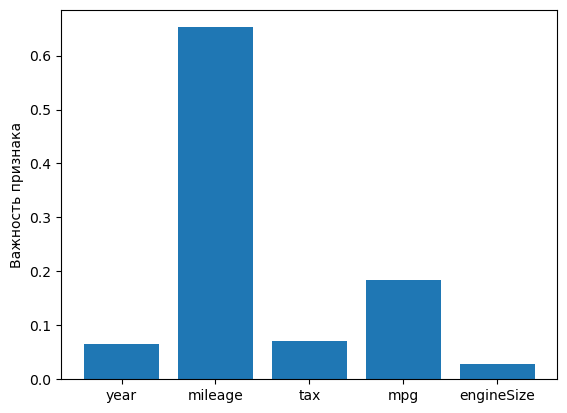

In [7]:
fig, ax = plt.subplots()
plt.ylabel("Важность признака")
plt.bar(x_train.columns, model.feature_importances_)
plt.show()

Как видно, самое большое значение имел пробег, а самое маленькое размер двигателя. Расход топлива хоть и не был так важен, как пробег, но тоже определенно играет роль в ценообразовании машин.

# Medium

In [8]:
import os

Чтобы склеить датасеты, пришлось убрать файлы `unclean_x`, потому что они содержат весьма странные данные и непонятные колонки, а также удалить колонки `tax`, `tax(£)` в тех датасетах, где они есть, поскольку про остальные датасеты ничего не известно.

In [9]:
dataframes = [pd.read_csv(os.path.join("..", "data", "cars", file)) for file in os.listdir("../data/cars")]
df_medium = pd.concat([dataframe.drop(columns=["tax", "tax(£)"], errors='ignore') for dataframe in dataframes], ignore_index=True)
df_medium

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,46.3,1.2


Также в некоторых строках присутствуют NaN-ы, так что удалим такие строки

In [10]:
df_medium = pd.get_dummies(df_medium)
df_medium.dropna(inplace=True, ignore_index=True)
df_medium

,year,price,mileage,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12500,15735,55.4,1.4,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2016,16500,36203,64.2,2.0,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2,2016,11000,29946,55.4,1.4,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,2017,16800,25952,67.3,2.0,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
4,2019,17300,1998,49.6,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2012,5990,74000,58.9,2.0,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
99183,2008,1799,88102,46.3,1.2,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
99184,2009,1590,70000,42.0,1.4,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
99185,2006,1250,82704,46.3,1.2,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


Теперь попробуем обучить на подготовленных данных дерево и лес с разными параметрами.

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_medium.drop(columns=["price"]), df_medium["price"], test_size=0.5, random_state=42)
tree_max_depth = list(range(5, 51, 2))
forest_params = {
    'n_estimators': [30, 50, 70],
    'max_depth': [10, 15],
    'min_samples_leaf': [10, 15]
}

MAX DEPTH = 5
r2_score on train = 0.6809499516118608
r2_score on test = 0.680243640776106
MAX DEPTH = 7
r2_score on train = 0.7507982388158168
r2_score on test = 0.7479554682386582
MAX DEPTH = 9
r2_score on train = 0.7520480557302396
r2_score on test = 0.7506366597670975
MAX DEPTH = 11
r2_score on train = 0.7861947351549459
r2_score on test = 0.7838993295413971
MAX DEPTH = 13
r2_score on train = 0.8028356028011839
r2_score on test = 0.7991433397877863
MAX DEPTH = 15
r2_score on train = 0.8073266824552451
r2_score on test = 0.8004634263429854
MAX DEPTH = 17
r2_score on train = 0.8250709947201463
r2_score on test = 0.8123872994713734
MAX DEPTH = 19
r2_score on train = 0.8278251903420655
r2_score on test = 0.8008514367945362
MAX DEPTH = 21
r2_score on train = 0.8579752466724275
r2_score on test = 0.8305104391149092
MAX DEPTH = 23
r2_score on train = 0.880245140270384
r2_score on test = 0.8392893466053817
MAX DEPTH = 25
r2_score on train = 0.892758320942631
r2_score on test = 0.83690401091

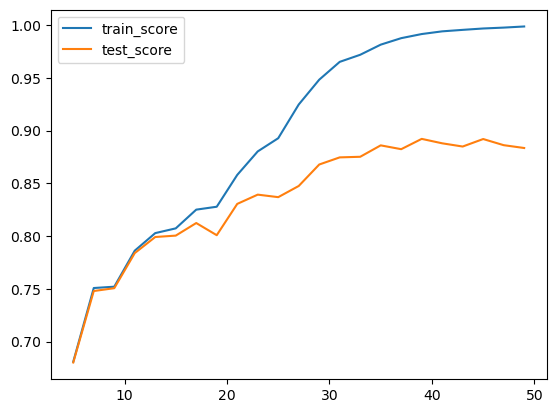

In [13]:
train_score = []
test_score = []
for max_depth in tree_max_depth:
  model = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(x_train, y_train)
  print("MAX DEPTH =", max_depth)
  print(f"r2_score on train = {r2_score(y_pred=model.predict(x_train), y_true=y_train)}\n"
    f"r2_score on test = {r2_score(y_pred=model.predict(x_test), y_true=y_test)}")
  train_score.append(r2_score(y_pred=model.predict(x_train), y_true=y_train))
  test_score.append(r2_score(y_pred=model.predict(x_test), y_true=y_test))

plt.plot(tree_max_depth, train_score, label = "train_score") 
plt.plot(tree_max_depth, test_score, label = "test_score") 
plt.legend() 
plt.show()

Наилучшую метрику на тесте дало дерево с max_depth=39 -- 0.892

Подберем лучшие параметры для леса

In [14]:
search = GridSearchCV(RandomForestClassifier(), forest_params, verbose=True)
search.fit(x_train, y_train)
best_forest = search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\sergf\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [15]:
best_forest

RandomForestClassifier(max_depth=15, min_samples_leaf=10, n_estimators=70)

In [16]:
x_test

,year,mileage,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
31981,2018,14044,64.2,1.1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
62387,2017,20179,68.9,1.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
30462,2019,15,65.7,2.0,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
21504,2018,24568,31.7,2.0,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
26653,2017,11373,54.3,1.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56654,2017,25535,80.7,1.5,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
74278,2015,49457,43.5,1.6,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
40496,2019,1173,39.2,2.2,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
57211,2020,2500,70.6,2.0,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [17]:
print(f"best random forest r2_score = {r2_score(y_pred=best_forest.predict(x_test), y_true=y_test)}")

best random forest r2_score = 0.8115779363518102
